# Regional Modeling Example with Diagnostics_ob

In this example, a simple global model is constructed with a configuration similar to the global_oce_latlon tutorial provided in MITcm/verification. The model is run for one year with standard output dumped every 0.2 year and boundary output dumped every day. Subsequently, a configuration in a subdomain of the global model is constructed and run over the same time, with boundary conditions given by outputs from the global run. This example concludes with a comparison of outputs between the two models, showing that both the global and subdomain configurations yield nearly identical results.

## Steps
Complete the steps provided below to complete this example:

### 1. Clone a clean version of the MITgcm source code

### 2. Clone the diagnostics_ob package in the MITgcm top level directory 

### 3. Copy the diagnostics_ob package to the MITgcm/pkg directory

### 4. Set up the global configuration
In this step, the ocean state and forcing files will be copied from tutorial_global_oce_latlon. In addition, the diagnostics_ob masks will be constructed.

### 5. Build and run the global model
Here, a build.sh and run.sh file is provided for convenience. NOTE: Be sure to edit the build.sh script with you system's optfile.

### 6. Set up the subdomain model using outputs from the diagnostics_ob in the global model

### 7. Build and run the subdomain model with BC's from diagnostics_ob
Note: Again, be sure to update the optfile

# Compare global and regional outputs

### Establish some pertinent metadata

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from MITgcmutils import mds

config_directory = os.getcwd()
config_directory = '/Users/mhwood/Documents/Research/Projects/Ocean_Modeling/MITgcm_clean/diagnostics_ob/example_configurations'

# read in global data
global_config = 'global_ocean'
global_run_dir = config_directory+'/'+global_config+'/run'

global_x = mds.rdmds(global_run_dir + '/XC*')
global_y = mds.rdmds(global_run_dir + '/YC*')
global_d = mds.rdmds(global_run_dir + '/RC')

global_time_step = 0.2 # global dump frequency
global_n_years = 1 # total global years
global_time = np.arange(0,global_n_years+global_time_step,global_time_step)

# these are the rows/cols of the masks generated for reference
min_col = 27
max_col = 63
min_row = 18
max_row = 33

x = global_x[0,:]
y = global_y[:,0]

x0 = x[min_col]+2
y0 = y[min_row]+2
Nx = max_col-min_col+1
Ny = max_row-min_row+1

# read in subdomain data
pacific_config = 'pacific_subdomain'
pacific_run_dir = config_directory+'/'+pacific_config+'/run'

pacific_x = mds.rdmds(pacific_run_dir + '/XC*')
pacific_y = mds.rdmds(pacific_run_dir + '/YC*')
pacific_d = mds.rdmds(pacific_run_dir + '/RC')

pacific_time_step = 0.2 # pacific dump drequency
pacific_n_years = 1 #7 # total pacific years
pacific_time = np.arange(0,pacific_n_years+pacific_time_step,pacific_time_step)


## Compare the outputs on a boundary

Text(0.5, 1.0, 'a-b)')

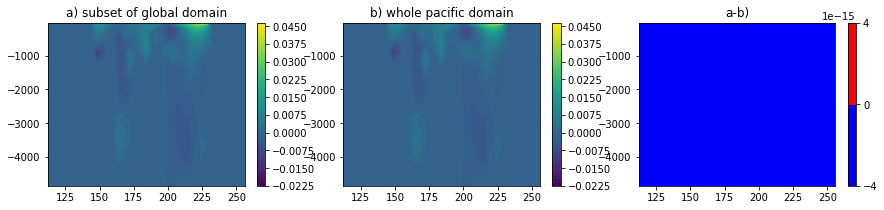

In [18]:
#############################################################################################
# Choose the inputs here

var_name = 'V' # choose from 'T','S','U','V','W'
timestep = 73 # choose from 0, 73, 146, 219, 292, 365 (standard output was dumped every 0.2 yr in both models)
boundary = 'north' # choose from 'south', 'north', 'east', or 'west'

#############################################################################################
# The rest of the code is for the plot

fig = plt.figure(figsize=(15,3))

global_var = mds.rdmds(global_run_dir + '/'+var_name+'*',timestep)
pacific_var = mds.rdmds(pacific_run_dir + '/'+var_name+'*',timestep)

if boundary == 'west':
    global_var = global_var[:,min_row:max_row+1,min_col]
    pacific_var = pacific_var[:,:,0]
    X = pacific_y[:,0]
if boundary == 'east':
    global_var = global_var[:,min_row:max_row+1,max_col]
    pacific_var = pacific_var[:,:,-1]
    X = pacific_y[:,0]
if boundary == 'north':
    global_var = global_var[:,max_row,min_col:max_col+1]
    pacific_var = pacific_var[:,-1,:]
    X = pacific_x[0,:]
if boundary == 'south':
    global_var = global_var[:,min_row,min_col:max_col+1]
    pacific_var = pacific_var[:,0,:]
    X = pacific_x[0,:]

plt.subplot(1,3,1)
C1=plt.contourf(X,pacific_d[:,0,0],global_var,50)
plt.colorbar(C1)
plt.title('a) subset of global domain')

plt.subplot(1,3,2)
C3=plt.contourf(X,pacific_d[:,0,0],pacific_var,50)
plt.colorbar(C3)
plt.title('b) whole pacific domain')

plt.subplot(1,3,3)
C5 = plt.contourf(X,pacific_d[:,0,0],global_var-pacific_var,50,cmap='seismic')
plt.colorbar(C5)
plt.title('a-b)')

## Compare the surface forcings

Text(0.5, 1.0, 'a-b)')

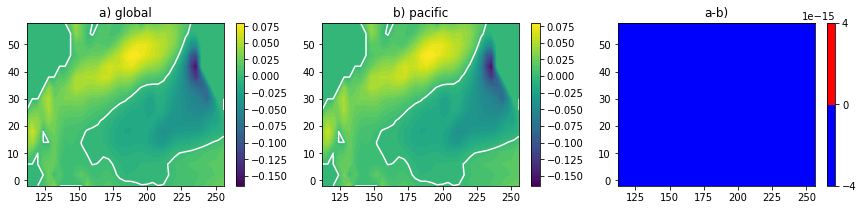

In [14]:
#############################################################################################
# Choose the inputs here

var_name = 'tauy' # choose from 'taux','tauy','qnet','empmr'
timestep = 182 # choose from 36, 109, 182, 255, 328 (standard output was dumped every 0.2 yr in both models)
boundary = 'south' # choose from 'south', 'north', 'east', or 'west'

#############################################################################################
# The rest of the code is for the plot

fig = plt.figure(figsize=(15,3))
v = ['taux','tauy','qnet','empmr'].index(var_name)

global_timestep =  36
pacific_timestep = global_timestep

global_var = mds.rdmds(global_run_dir + '/diagsEXF*',timestep)
pacific_var = mds.rdmds(pacific_run_dir + '/diagsEXF*',timestep)
global_var = global_var[:,min_row:max_row+1,min_col:max_col+1]

plt.subplot(1,3,1)
C1=plt.contourf(pacific_x[0,:],pacific_y[:,0],global_var[v,:,:],50)
plt.contour(pacific_x[0,:],pacific_y[:,0],global_var[v,:,:],levels=[0],colors='w')
plt.colorbar(C1)
plt.title('a) global')

plt.subplot(1,3,2)
C3=plt.contourf(pacific_x[0,:],pacific_y[:,0],pacific_var[v,:,:],50)
plt.contour(pacific_x[0,:],pacific_y[:,0],pacific_var[v,:,:],levels=[0],colors='w')
plt.colorbar(C3)
plt.title('b) pacific')

plt.subplot(1,3,3)
C5 = plt.contourf(pacific_x[0,:],pacific_y[:,0],global_var[v,:,:]-pacific_var[v,:,:],50,cmap='seismic')
plt.colorbar(C5)
plt.title('a-b)')

## Compare the outputs at a point through time

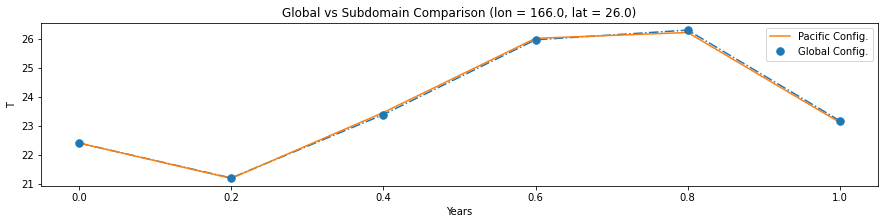

In [27]:
#############################################################################################
# Choose the inputs here

var_name = 'T' # choose from 'T','S','U','V','W','Eta
depth_index = 0 # 0 - 14
lon_col_pacific = 14 # column in pacific array (0-36)
lat_row_pacific = 8 # row in pacific array (0-15)

#############################################################################################
# The rest of the code is for the plot

lon_col_global = min_col+lon_col_pacific # column in global array
lat_row_global = min_row+lat_row_pacific # row in glboal array

fig = plt.figure(figsize=(15,3))


# read in global data
global_var = []
for year in global_time:
    g = mds.rdmds(global_run_dir + '/'+var_name+'*',int(year*365)) # shape is (15,40,90)
    global_var.append(g)
global_var = np.stack(global_var)
if var_name!='Eta':
    global_var = global_var[:,depth_index,:,:]
global_var_timeseries = global_var[:,lat_row_global,lon_col_global]

# read in subdomain data
pacific_var = []
for year in pacific_time:
    g = mds.rdmds(pacific_run_dir + '/'+var_name+'*',int(year*365)) # shape is (15,40,90)
    pacific_var.append(g)
pacific_var = np.stack(pacific_var)
if var_name!='Eta':
    pacific_var = pacific_var[:,depth_index,:,:]
pacific_var_timeseries = pacific_var[:,lat_row_pacific,lon_col_pacific]

plt.plot(global_time,global_var_timeseries,'-.')
plt.plot(pacific_time,pacific_var_timeseries,label='Pacific Config.')
plt.plot(global_time,global_var_timeseries,'.',markersize=15,color=u'#1f77b4',label='Global Config.')
plt.ylabel(var_name)
plt.xlabel('Years')
plt.title('Global vs Subdomain Comparison (lon = '+str(global_x[0,lon_col_global])+', lat = '+str(global_y[lat_row_global,0])+')')
plt.legend()